Linear regression을 학습하며, 기계학습의 원리 및 TensorFlow를 익히는 notebook입니다. 

**라이브러리 Import 하기**

In [1]:
# import tensorflow as tf
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

import numpy as np
import matplotlib.pyplot as plt

Instructions for updating:
non-resource variables are not supported in the long term


**X and Y data (given)**

In [2]:
x_train = [1, 2, 3, 4, 5]
# y_train = [2, 4, 6, 8, 10]

y_train = [3, 5, 7, 9, 11] # y = 2x + 1

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

# y_train = [2+0.1, 4-0.3, 6+0.15]  # 약간의 noise 추가 

# y_train = [2, 4, 6]   # x_train에 2배를 곱해서 생성 
# y_train = [3, 5, 7]

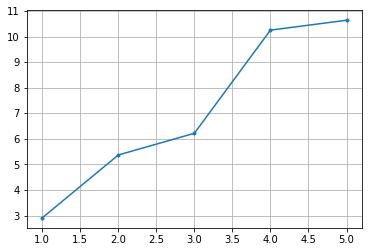

In [3]:
plt.plot(x_train, y_train,'.-')
plt.grid()

**Initialization**

In [5]:
useRandom = False

In [6]:
if useRandom:
   W = tf.Variable(tf.random_normal([1]), name='weight')
   b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
  w0 = 7.0;
  b0 = 5.0;

  W = tf.Variable(w0*tf.ones([1]), name='weight')
  b = tf.Variable(b0*tf.ones([1]), name='bias')

**Our hypothesis XW+b**

$$ H(x) = Wx + b$$

In [7]:
hypothesis = x_train * W + b

**cost/loss function 정의하기**



*   loss of one training example :
$$loss = \mathcal{L}(\hat{y}, y) = (\hat y^{(i)} - y^{(i)})^2 $$

In [8]:
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

**Optimizer**

In [9]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

**Launch the graph in a session**

In [10]:
sess = tf.Session()

**Initalizes global variables in the graph.**

In [11]:
sess.run(tf.global_variables_initializer())

In [13]:
nb_epoch = 2001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 50 == 0: # 100번마다
      w1 = sess.run(W)[0] # 기울기
      b1 = sess.run(b)[0] # bias

      print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 139.53317 	 4.648285 	 4.3307257
50 	 1.2574391 	 1.4628112 	 3.0384212
100 	 1.0347639 	 1.5518444 	 2.7169657
150 	 0.8760597 	 1.6270123 	 2.445586
200 	 0.76294816 	 1.6904709 	 2.2164798
250 	 0.6823312 	 1.7440447 	 2.023062
300 	 0.6248741 	 1.7892729 	 1.8597734
350 	 0.58392346 	 1.8274558 	 1.721921
400 	 0.5547372 	 1.8596907 	 1.6055429
450 	 0.53393567 	 1.8869042 	 1.5072932
500 	 0.51910996 	 1.9098786 	 1.4243482
550 	 0.50854343 	 1.9292743 	 1.3543236
600 	 0.5010125 	 1.9456488 	 1.295207
650 	 0.4956451 	 1.9594723 	 1.2452993
700 	 0.49181947 	 1.9711426 	 1.2031658
750 	 0.489093 	 1.980995 	 1.1675959
800 	 0.48714995 	 1.9893126 	 1.1375667
850 	 0.4857649 	 1.9963346 	 1.1122152
900 	 0.48477775 	 2.0022626 	 1.0908133
950 	 0.48407435 	 2.0072672 	 1.0727447
1000 	 0.4835728 	 2.0114923 	 1.0574908
1050 	 0.48321557 	 2.0150595 	 1.0446132
1100 	 0.48296076 	 2.0180707 	 1.0337412
1150 	 0.48277935 	 2.0206127 	 1.0245632
1200 	 0.48264986 	 2.022759 	 1.0

Text(0, 0.5, 'loss')

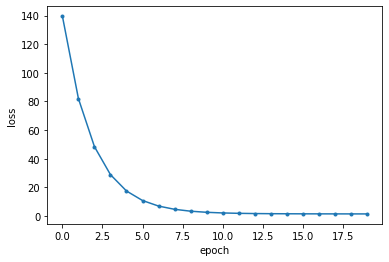

In [14]:
plt.plot(vloss[:20], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

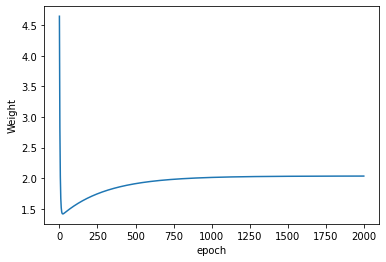

In [15]:
# W의 epoch에 따른 변화 그래프 
plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

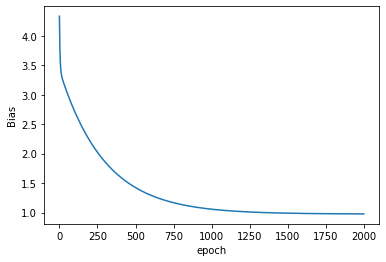

In [18]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

**학습완료**

In [19]:
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

출력해보기

In [20]:
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

2.033615 0.9776195
y = 2.033615x + 0.9776195


Text(0.5, 1.0, 'y = 2.033615x + 0.9776195')

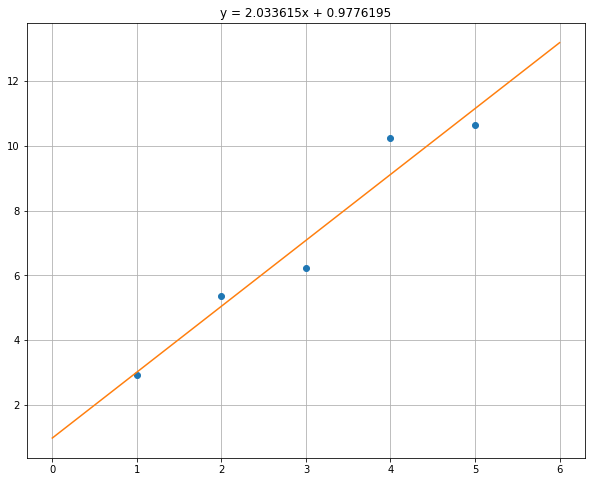

In [21]:
plt.figure(figsize=(10,8)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
#plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1 , 
# np.max(y_train) + 1))
plt.title(str1)

**스스로 해보기**

1번

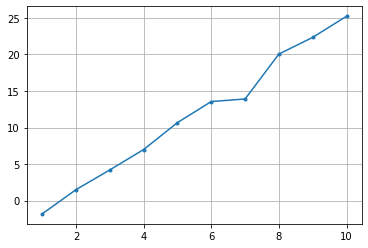

In [22]:
# X and Y data
x_train = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

y_train = [-2, 1, 4, 7, 10, 13, 16, 19, 22, 25]  # y = 3x - 5

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

plt.plot(x_train, y_train,'.-')
plt.grid()

In [23]:
# initialization
useRandom = False

if useRandom:
   W = tf.Variable(tf.random_normal([1]), name='weight')
   b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
   w0 = 9.0;
   b0 = 7.0;

   W = tf.Variable(w0*tf.ones([1]), name='weight')
   b = tf.Variable(b0*tf.ones([1]), name='bias')

In [24]:
# Our hypothesis XW+b
hypothesis = x_train * W + b

# loss function 정의하기 
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [25]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph 
sess.run(tf.global_variables_initializer())

In [26]:
nb_epoch = 2001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 100 == 0: # 100번마다
      w1 = sess.run(W)[0] # 기울기
      b1 = sess.run(b)[0] # bias

      print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 129.6079 	 3.0743654 	 6.1031837
100 	 11.036634 	 1.9807149 	 2.2274022
200 	 5.123662 	 2.3242965 	 -0.16455165
300 	 2.575247 	 2.5498564 	 -1.7348604
400 	 1.4769113 	 2.6979358 	 -2.7657626
500 	 1.0035429 	 2.7951493 	 -3.4425457
600 	 0.79952586 	 2.8589697 	 -3.8868515
700 	 0.71159804 	 2.9008675 	 -4.1785364
800 	 0.673702 	 2.9283733 	 -4.370027
900 	 0.65736955 	 2.946431 	 -4.4957404
1000 	 0.65032965 	 2.9582858 	 -4.5782723
1100 	 0.6472961 	 2.966068 	 -4.632451
1200 	 0.64598924 	 2.971177 	 -4.66802
1300 	 0.6454252 	 2.9745312 	 -4.6913695
1400 	 0.6451827 	 2.976733 	 -4.706699
1500 	 0.64507794 	 2.9781785 	 -4.7167616
1600 	 0.6450325 	 2.9791276 	 -4.72337
1700 	 0.64501286 	 2.9797509 	 -4.7277083
1800 	 0.64500475 	 2.9801598 	 -4.7305555
1900 	 0.64500105 	 2.9804285 	 -4.7324266
2000 	 0.64499986 	 2.9806046 	 -4.7336535


Text(0, 0.5, 'loss')

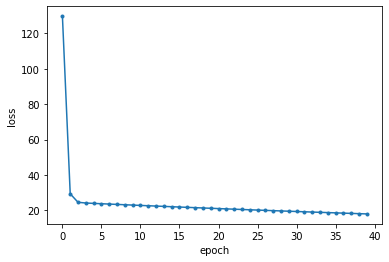

In [28]:
plt.plot(vloss[:40], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

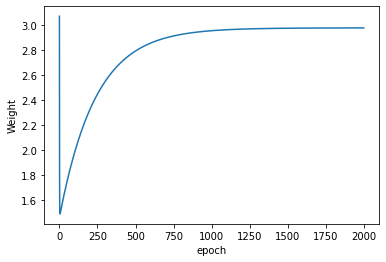

In [29]:
# W의 epoch에 따른 변화 그래프 
plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

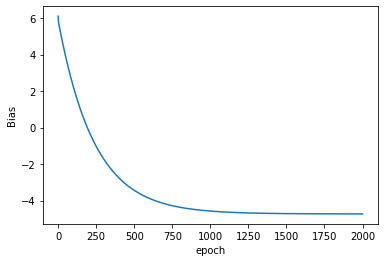

In [30]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

In [31]:
# 학습완료
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

In [32]:
# 출력해보기
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

2.9806046 -4.7336535
y = 2.9806046x + -4.7336535


Text(0.5, 1.0, 'y = 2.9806046x + -4.7336535')

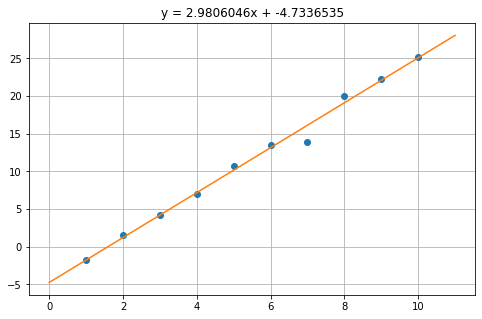

In [33]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
# plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1,
# np.max(y_train) + 1))
plt.title(str1)

2번

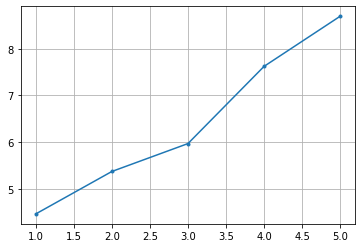

In [40]:
# X and Y data
x_train = [1, 2, 3, 4, 5]

y_train = [4.2, 5.4, 6.6, 7.8, 9.0]  # y = 1.2x + 3

signal_length = len(x_train)
y_noise = np.random.normal(0,1, signal_length)

y_train = y_train + y_noise

plt.plot(x_train, y_train,'.-')
plt.grid()

In [41]:
# initialization
useRandom = True

if useRandom:
   W = tf.Variable(tf.random_normal([1]), name='weight')
   b = tf.Variable(tf.random_normal([1]), name = 'bias')
else:
   w0 = 5.0;
   b0 = 3.0;

   W = tf.Variable(w0*tf.ones([1]), name='weight')
   b = tf.Variable(b0*tf.ones([1]), name='bias')

In [42]:
# Our hypothesis XW+b
hypothesis = x_train * W + b

# loss function 정의하기 
loss = tf.reduce_mean(tf.square(hypothesis - y_train))

# Optimizer
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)
train = optimizer.minimize(loss)

In [43]:
# Launch the graph in a session
sess = tf.Session()

# Initializes global variables in the graph 
sess.run(tf.global_variables_initializer())

In [44]:
nb_epoch = 1001
vloss = [] # empty list
vb = [] # empty list
vw = [] # empty list

for step in range(nb_epoch):
    sess.run(train)
    loss1 = sess.run(loss)
    vloss.append(loss1)
    w1 = sess.run(W)
    vw.append(w1)
    b1 = sess.run(b)
    vb.append(b1)
    
    if step % 50 == 0: # 50번마다
      w1 = sess.run(W)[0] # 기울기
      b1 = sess.run(b)[0] # bias

      print(step, '\t', loss1, '\t', w1, '\t', b1)

0 	 18.025177 	 0.6545198 	 0.2635625
50 	 0.9510582 	 1.6865096 	 0.99031955
100 	 0.69351435 	 1.5907558 	 1.3360273
150 	 0.50995827 	 1.5099164 	 1.6278827
200 	 0.3791346 	 1.44167 	 1.8742745
250 	 0.28589422 	 1.3840544 	 2.082285
300 	 0.21944025 	 1.3354139 	 2.2578924
350 	 0.17207697 	 1.29435 	 2.4061456
400 	 0.13832036 	 1.259683 	 2.5313048
450 	 0.11426141 	 1.2304162 	 2.6369677
500 	 0.09711422 	 1.2057081 	 2.726171
550 	 0.08489314 	 1.1848494 	 2.8014784
600 	 0.076182835 	 1.1672395 	 2.865055
650 	 0.06997497 	 1.1523731 	 2.9187279
700 	 0.065550424 	 1.1398224 	 2.96404
750 	 0.062397044 	 1.1292267 	 3.0022936
800 	 0.060149513 	 1.1202816 	 3.034588
850 	 0.058547687 	 1.1127298 	 3.0618525
900 	 0.05740603 	 1.1063545 	 3.0848694
950 	 0.056592345 	 1.1009722 	 3.1043012
1000 	 0.056012414 	 1.0964284 	 3.1207058


Text(0, 0.5, 'loss')

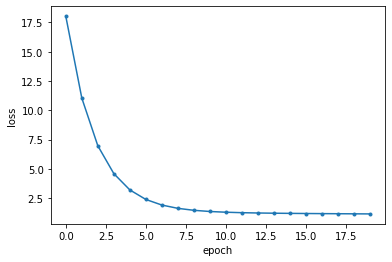

In [45]:
plt.plot(vloss[:20], '.-')
plt.xlabel('epoch')
plt.ylabel('loss')

Text(0, 0.5, 'Weight')

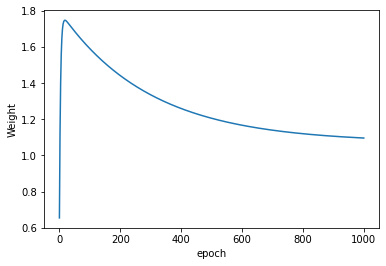

In [46]:
# W의 epoch에 따른 변화 그래프 
plt.plot(vw[:], '-')
plt.xlabel('epoch')
plt.ylabel('Weight')

Text(0, 0.5, 'Bias')

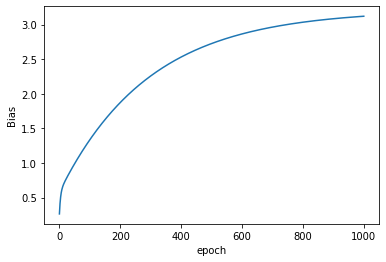

In [47]:
# b의 epoch에 따른 변화 그래프 
plt.plot(vb[:], '-')
plt.xlabel('epoch')
plt.ylabel('Bias')

In [48]:
# 학습완료
w1 = sess.run(W)[0] # 기울기 
b1 = sess.run(b)[0] # bias

In [49]:
# 출력해보기
print(w1, b1)

str1 = 'y = ' + str(w1) + 'x + ' + str(b1)
print(str1)

1.0964284 3.1207058
y = 1.0964284x + 3.1207058


Text(0.5, 1.0, 'y = 1.0964284x + 3.1207058')

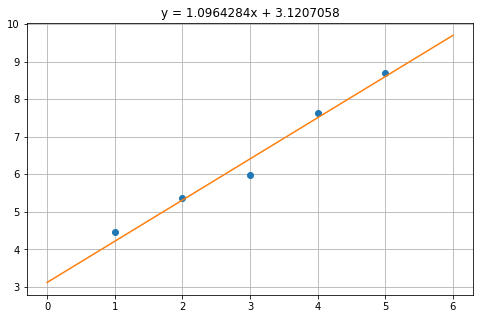

In [50]:
plt.figure(figsize=(8,5)) 
plt.plot(x_train, y_train, 'o') # train_data 그리기

# 직선 그래프를 그리기 위한 코드
# 그래프의 x좌표를 일정 간격으로 설정함 
x1 = np.linspace(np.min(x_train)-1, np.max(x_train)+1)
y1 = w1*x1 + b1
plt.plot(x1, y1)

plt.grid() # 격자
# plt.axis((np.min(x_train) - 1, np.max(x_train) + 1, np.min(y_train) - 1,
# np.max(y_train) + 1))
plt.title(str1)